### Mouse Slide-seq
Benchmarking for this notebook:
 - Processors: 8 x AMD EPYC 7542 32-Core
 - Runtime: XX:XX:XX (hh:mm:ss)
 - Memory utilized: XX.XX GB

In [1]:
RCTD_dir <- "path/to/RCTD_results"
path_to_results <- "path/to/results"

In [2]:
libraries <- c("ggplot2", "Seurat", "glue", "dplyr", "anndata", "spacexr", 
               "data.table", "Matrix", "mltools", "enrichR", "R.utils")
lapply(libraries, function(x) suppressMessages(require(x, character.only = TRUE,quietly=TRUE,warn.conflicts = FALSE)))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

In [3]:
sample <- "200115_08"

In [4]:
wd <- "/ahg/regevdata/users/dzhang/projects/HTAPP_MBC/src"
path_to_data <- paste0(wd, 
                       "/slide_CNV_official_v2/data/SlideCNA_zenodo/11-03-24/")
path_to_results <- paste0(wd, 
                          "/slide_CNV_official_v2/mouse/", 
                          sample, 
                          "/vignette_test/results/")

In [5]:
setwd(paste0(wd, "/slide_CNV_official/SlideCNA_Analysis/"))

In [6]:
# Assumes you're working in the repository root directory
source(glue("code/RCTD.R"))
source(glue("code/utils.R"))

In [7]:
#TD
beads_df <- fread(paste0(path_to_results, 'beads_df.csv'))

In [4]:
beads_df <- fread('/data2/core-genlmu/jwatter/Data/SlideCNA_mouse/beads_df.csv')

In [8]:
beads_df

V1,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,pos_x,pos_y,nCount_RNA,cluster_type,bc
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AACGTCATAATCGT,6503,23736,0,0,888.95,3219.5,23736,Malignant,AACGTCATAATCGT
TACTTTAGCGCAGT,5988,19632,0,0,4762.20,5020.4,19632,Malignant,TACTTTAGCGCAGT
CATGCCTGGGTTCG,5303,15982,0,0,886.50,3199.6,15982,Malignant,CATGCCTGGGTTCG
TCGATATGGCACAA,5523,15038,0,0,2237.10,5144.6,15038,Malignant,TCGATATGGCACAA
TTATCTGACGAAGC,4927,13993,0,0,1031.80,2425.2,13993,Normal,TTATCTGACGAAGC
GATGCGACTCCTCG,4345,12712,0,0,5387.00,2291.6,12712,Malignant,GATGCGACTCCTCG
ACGGATGTTCCGAT,3656,10424,0,0,3760.30,4171.7,10424,Malignant,ACGGATGTTCCGAT
TCTCATGGGTGGGA,3874,10761,0,0,1007.90,3523.8,10761,Normal,TCTCATGGGTGGGA
ACCGGAACTTCTTC,4328,9739,0,0,3259.40,1233.7,9739,Malignant,ACCGGAACTTCTTC


In [9]:
# TD
library(reticulate)
#use_condaenv(condaenv = "SlideCNA_env") #if error, set conda environment manually for reticulate
so_adata <- read_h5ad(paste0(path_to_results, "Puck.h5ad")) # output from slide-seq_prep_mouse.ipynb

In [6]:
library(reticulate)
#use_condaenv(condaenv = "SlideCNA_env") #if error, set conda environment manually for reticulate
so_adata <- read_h5ad("path/to/Puck.h5ad") # output from slide-seq_prep_mouse.ipynb

In [10]:
so_adata

AnnData object with n_obs <U+00D7> n_vars = 10114 <U+00D7> 15856
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pos_x', 'pos_y', 'nCount_RNA', 'cluster_type', 'bc'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'counts_var'
    obsm: 'counts'

In [11]:
rownames(so_adata$var)

[1] "0610007P14Rik"  "0610009B22Rik"  "0610009E02Rik"  "0610009L18Rik" 
    [5] "0610009O20Rik"  "0610010F05Rik"  "0610011F06Rik"  "0610030E20Rik" 
    [9] "0610037L13Rik"  "0610040B10Rik"  "0610040F04Rik"  "0610040J01Rik" 
   [13] "0610043K17Rik"  "1010001B22Rik"  "1110001J03Rik"  "1110002E22Rik" 
   [17] "1110002L01Rik"  "1110004E09Rik"  "1110004F10Rik"  "1110007C09Rik" 
   [21] "1110008F13Rik"  "1110008L16Rik"  "1110008P14Rik"  "1110012L19Rik" 
   [25] "1110017D15Rik"  "1110018N20Rik"  "1110019D14Rik"  "1110020A21Rik" 
   [29] "1110025M09Rik"  "1110032A03Rik"  "1110032F04Rik"  "1110034G24Rik" 
   [33] "1110037F02Rik"  "1110038B12Rik"  "1110038F14Rik"  "1110046J04Rik" 
   [37] "1110051M20Rik"  "1110059E24Rik"  "1110059G10Rik"  "1110065P20Rik" 
   [41] "1190002N15Rik"  "1190005I06Rik"  "1190007I07Rik"  "1200014J11Rik" 
   [45] "1300002E11Rik"  "1300017J02Rik"  "1500002C15Rik"  "1500002F19Rik" 
   [49] "1500004A13Rik"  "1500009C09Rik"  "1500009L16Rik"  "1500011B03Rik" 
   [53] "1500011K16Rik"  "1500012F01Rik"  "1500012K07Rik"  "1500015A07Rik" 
   [57] "1500015O10Rik"  "1500017E21Rik"  "1500026H17Rik"  "1500035N22Rik" 
   [61] "1600002H07Rik"  "1600002K03Rik"  "1600010M07Rik"  "1600012H06Rik" 
   [65] "1600014C10Rik"  "1600020E01Rik"  "1700001C02Rik"  "1700001G11Rik" 
   [69] "1700001L19Rik"  "1700001O22Rik"  "1700003D09Rik"  "1700003E16Rik" 
   [73] "1700003F12Rik"  "1700003M02Rik"  "1700003M07Rik"  "1700007B14Rik" 
   [77] "1700007G11Rik"  "1700007K13Rik"  "1700007L15Rik"  "1700007P06Rik" 
   [81] "1700008J07Rik"  "1700008O03Rik"  "1700010I14Rik"  "1700010K23Rik" 
   [85] "1700010K24Rik"  "1700011I03Rik"  "1700012B09Rik"  "1700013F07Rik" 
   [89] "1700016K19Rik"  "1700016P03Rik"  "1700017B05Rik"  "1700018L02Rik" 
   [93] "1700019A02Rik"  "1700019D03Rik"  "1700019G17Rik"  "1700019G24Rik" 
   [97] "1700019L03Rik"  "1700020G17Rik"  "1700020I14Rik"  "1700021F05Rik" 
  [101] "1700021K19Rik"  "1700023F06Rik"  "1700024G13Rik"  "1700024P16Rik" 
  [105] "1700025G04Rik"  "1700026D08Rik"  "1700026L06Rik"  "1700027A07Rik" 
  [109] "1700027H10Rik"  "1700028E10Rik"  "1700028J19Rik"  "1700028P14Rik" 
  [113] "1700029I15Rik"  "1700029J07Rik"  "1700030F04Rik"  "1700030J22Rik" 
  [117] "1700030K09Rik"  "1700034H15Rik"  "1700034P13Rik"  "1700037C18Rik" 
  [121] "1700037H04Rik"  "1700040D17Rik"  "1700040L02Rik"  "1700041G16Rik" 
  [125] "1700047M11Rik"  "1700048O20Rik"  "1700049G17Rik"  "1700052K11Rik" 
  [129] "1700055D18Rik"  "1700056N10Rik"  "1700063D05Rik"  "1700066M21Rik" 
  [133] "1700084C01Rik"  "1700084C06Rik"  "1700086L19Rik"  "1700086O06Rik" 
  [137] "1700086P04Rik"  "1700088E04Rik"  "1700093J21Rik"  "1700096K18Rik" 
  [141] "1700101E01Rik"  "1700101I11Rik"  "1700102P08Rik"  "1700109H08Rik" 
  [145] "1700112D23Rik"  "1700112E06Rik"  "1700112J16Rik"  "1700113A16Rik" 
  [149] "1700113H08Rik"  "1700120C14Rik"  "1700120G11Rik"  "1700123M08Rik" 
  [153] "1700123O20Rik"  "1700123O21Rik"  "1700124L16Rik"  "1810009A15Rik" 
  [157] "1810010H24Rik"  "1810010K12Rik"  "1810011O10Rik"  "1810013L24Rik" 
  [161] "1810014B01Rik"  "1810020O05Rik"  "1810021B22Rik"  "1810022K09Rik" 
  [165] "1810024B03Rik"  "1810026B05Rik"  "1810026J23Rik"  "1810030O07Rik" 
  [169] "1810032O08Rik"  "1810037I17Rik"  "1810041H14Rik"  "1810041L15Rik" 
  [173] "1810043G02Rik"  "1810043H04Rik"  "1810044D09Rik"  "1810055G02Rik" 
  [177] "1810058I24Rik"  "1810062O18Rik"  "2010001A14Rik"  "2010002M12Rik" 
  [181] "2010007H06Rik"  "2010012O05Rik"  "2010015M23Rik"  "2010107E04Rik" 
  [185] "2010107G23Rik"  "2010109A12Rik"  "2010111I01Rik"  "2010204K13Rik" 
  [189] "2010300C02Rik"  "2010300F17Rik"  "2010308F09Rik"  "2010315B03Rik" 
  [193] "2010320M18Rik"  "2200002D01Rik"  "2210008F06Rik"  "2210011C24Rik" 
  [197] "2210013O21Rik"  "2210016F16Rik"  "2210016L21Rik"  "2210018M11Rik" 
  [201] "2210404O09Rik"  "2210406O10Rik"  "2210408F21Rik"  "2210408I21Rik" 
  [205] "2300009A05Rik"  "2310001H17Rik"  "2310002F09Rik"  "2310003H01Rik" 
  [209] "2310007L24Rik"  "2310009A05Rik"  "2310009B1

In [12]:
### Get counts from anndata object. Adjusted this function from utils.R, since adata.uns does not serialize.
get_adata_counts <- function(adata) {
    counts <- adata$obsm$counts %>% 
        t() %>% # transpose
        as.data.frame() %>%
        `rownames<-`(rownames(adata$var)) %>%
        `colnames<-`(adata$obs_names)
    return(counts)
   }

In [13]:
counts <- get_adata_counts(so_adata)

In [ ]:
counts <- counts %>% select(beads_df$bc)
counts_mat <- counts %>% as.data.table() %>% sparsify()
row.names(counts_mat) <- row.names(counts)
so=make_seurat_annot(counts_mat, beads_df, seed_FindClusters = 0, seed_RunTSNE = 1, seed_RunUMAP = 42)

In [12]:
md=as.data.table(so@meta.data)
rownames(md) <- md$bc

In [9]:
output_directory <- file.path(path_to_results, "SlideCNA")
plot_directory <- file.path(output_directory, "plots")
dir.create(output_directory, showWarnings = FALSE)
dir.create(plot_directory, showWarnings = FALSE)

In [7]:
# Run SlideCNA
library(SlideCNA)


Attaching package: 'SlideCNA'


The following object is masked from 'package:Seurat':

    SpatialPlot


The following object is masked from 'package:base':

    mode




In [19]:
# TD
gene_pos <- fread(paste0(path_to_results, 'mouse_gencode.GRCm39.vM32.basic.annotation.by_gene_name.infercnv_positions_rel_gene_pos.csv'))
gene_pos

GENE,chr,start,end,rel_gene_pos
<chr>,<chr>,<int>,<int>,<int>
4933401J01Rik,chr1,3143476,3144545,1
Gm26206,chr1,3172239,3172348,2
Xkr4,chr1,3276124,3741721,3
Gm18956,chr1,3322980,3323459,4
Gm37180,chr1,3435954,3438772,5
Gm37363,chr1,3445779,3448011,6
Gm37686,chr1,3535200,3537508,7
Gm1992,chr1,3536810,3583776,8
Gm37329,chr1,3582674,3584730,9


In [19]:
# Read in the gene_position csv that was adapted from inferCNV
gene_pos <- fread('mouse_gencode.GRCm39.vM32.basic.annotation.by_gene_name.infercnv_positions_rel_gene_pos.csv')
gene_pos

GENE,chr,start,end,rel_gene_pos
<chr>,<chr>,<int>,<int>,<int>
4933401J01Rik,chr1,3143476,3144545,1
Gm26206,chr1,3172239,3172348,2
Xkr4,chr1,3276124,3741721,3
Gm18956,chr1,3322980,3323459,4
Gm37180,chr1,3435954,3438772,5
Gm37363,chr1,3445779,3448011,6
Gm37686,chr1,3535200,3537508,7
Gm1992,chr1,3536810,3583776,8
Gm37329,chr1,3582674,3584730,9


Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  Ppp3ca, Hpca, Nrgn, Chn1, Ptk2b, Gria2, Rbfox1, Camk2b, Wipf3, Olfm1 
	   Ppp3r1, Fam131a, Atp2b1, Kalrn, Ncdn, 2010300C02Rik, Ddn, Icam5, Enc1, Dlgap1 
	   Lppr4, Wasf1, Cpne6, Grin2a, Itpka, Neurod2, Slc8a2, Cnksr2, Prkce, Cplx2 
Negative:  Plp1, Enpp2, Apoe, Dbi, Cd63, Ptgds, Zic1, Apod, Trf, Cnp 
	   Ccdc153, Mal, Tppp3, Cldn11, Calml4, 1500015O10Rik, Mbp, Pltp, Rsph1, Mag 
	   Car2, Rarres2, Mog, Tmem212, Neat1, Gm5741, Mobp, Cryab, Tac2, Pla2g16 
PC_ 2 
Positive:  Cldn11, Mag, Mal, Mog, Ermn, Trf, Cnp, Tmem88b, Plp1, Mobp 
	   Gatm, Sept4, Mbp, Tspan2, Ugt8a, Opalin, Gjc3, Cryab, Apod, Ndrg1 
	   Gpr37, Gjc2, Car2, Qdpr, Qk, Pllp, Il33, Aspa, Tmem63a, Olig1 
Negative:  Ccdc153, Rsph1, Tmem212, Rarres2, Calml4, 1500015O10Rik, Nwd2, Tac2, Gm5741, Ak7 
	   Nnat, 2410004P03Rik, Enkur, Pltp, Dynlrb2, Drc7, Lrrc23, 1700012B09Rik, 1110017D15Rik, Cfap126 
	   Scube1, Fam183b, Tm4sf1, Mlf1, Hdc, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10114
Number of edges: 340452

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8842
Number of communities: 16
Elapsed time: 1 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
04:36:37 UMAP embedding parameters a = 0.9922 b = 1.112

04:36:37 Read 10114 rows and found 10 numeric columns

04:36:37 Using Annoy for neighbor search, n_neighbors = 30

04:36:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

04:36:39 Writing NN index file to temp file /local/scratch/47824579.1.interactive/RtmpJzHifU/file1e0e34d75fde4

04:36:39 Searching Annoy index using 1 thread, search_k = 3000

Warning message:
"Invalid .internal.selfref detected and fixed by taking a (shallow) cop

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 843
Number of edges: 22107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8492
Number of communities: 10
Elapsed time: 0 seconds


09:21:07 UMAP embedding parameters a = 0.9922 b = 1.112

09:21:07 Read 843 rows and found 10 numeric columns

09:21:07 Using Annoy for neighbor search, n_neighbors = 30

09:21:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:21:07 Writing NN index file to temp file /local/scratch/47824579.1.interactive/RtmpJzHifU/file1e0e33bb999e9

09:21:07 Searching Annoy index using 1 thread, search_k = 3000

09:21:08 Annoy recall = 100%

09:21:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

09:21:14 Initializing from normalized Laplacian + noise (using irlba)

09:21:14 Commencing optimization for 500 epochs, with 30300 positive edges

09:21:20 Optimization finished

Warning message in asMethod(object):
"sparse->dense coercion: allocat

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 843
Number of edges: 22107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8492
Number of communities: 10
Elapsed time: 0 seconds


09:22:57 UMAP embedding parameters a = 0.9922 b = 1.112

09:22:57 Read 843 rows and found 10 numeric columns

09:22:57 Using Annoy for neighbor search, n_neighbors = 30

09:22:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:22:57 Writing NN index file to temp file /local/scratch/47824579.1.interactive/RtmpJzHifU/file1e0e3436f0052

09:22:57 Searching Annoy index using 1 thread, search_k = 3000

09:22:58 Annoy recall = 100%

09:23:00 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

09:23:04 Initializing from normalized Laplacian + noise (using irlba)

09:23:04 Commencing optimization for 500 epochs, with 30300 positive edges

09:23:10 Optimization finished

Calculating cluster 2

Calculating cluster 3

Calculating cluster 1



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.2 GiB"
Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  Calml4, Dbi, Gm5741, Cd63, Rsph1, Zic4, Zic1, Lbp, Ak7, Lrrc23 
	   Otx2, Ccdc153, Pltp, Pou4f1, Dynlrb2, Sncg, Irx1, Tmem176b, Rarres2, Necab2 
	   Mia, Cfap126, Mlf1, Tac2, Rsph4a, Tmem212, Pifo, Syt9, 2410004P03Rik, Tppp3 
Negative:  Ppp3ca, Chn1, Camk2a, Hpca, Ptk2b, Ppp3r1, Wasf1, Neurod2, Gria2, Fam131a 
	   Kalrn, Rbfox1, Camk2b, Dlgap1, Nrgn, Icam5, Itpka, Cnksr2, Slc8a2, Chrm1 
	   Prkce, 2010300C02Rik, Gabra5, Baiap2, Olfm1, Arf3, Rasgef1a, Zbtb18, Grin2a, Enc1 
PC_ 2 
Positive:  Prkcd, Shox2, Synpo2, Ntng1, Inadl, Tnnt1, Amotl1, Ramp3, Adarb1, Plcb4 
	   Rgs16, Rora, Ccdc136, Ptpn4, Pdp1, Plekhg1, Nexn, Lef1, Cit, Grm1 
	   Kcnc2, Tcf7l2, Ptpn3, Zfhx3, Nrip3, Gabra4, Slc17a6, Rab37, Lrrtm1, Pcp4 
Negative:  Nrgn, Cplx2, Ctxn1, Snca, Pde2a, Psd, Gda, Ddn, Tcf4, Baiap2 
	   Pde1a, Fam131a,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 632
Number of edges: 16260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8312
Number of communities: 10
Elapsed time: 0 seconds


09:35:19 UMAP embedding parameters a = 0.9922 b = 1.112

09:35:19 Read 632 rows and found 10 numeric columns

09:35:19 Using Annoy for neighbor search, n_neighbors = 30

09:35:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:35:20 Writing NN index file to temp file /local/scratch/47824579.1.interactive/RtmpJzHifU/file1e0e311d65ae2

09:35:20 Searching Annoy index using 1 thread, search_k = 3000

09:35:20 Annoy recall = 100%

09:35:22 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

09:35:27 Initializing from normalized Laplacian + noise (using irlba)

09:35:27 Commencing optimization for 500 epochs, with 21866 positive edges

09:35:32 Optimization finished

Warning message in asMethod(object):
"sparse->dense coercion: allocat

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 632
Number of edges: 16260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8312
Number of communities: 10
Elapsed time: 0 seconds


09:36:53 UMAP embedding parameters a = 0.9922 b = 1.112

09:36:53 Read 632 rows and found 10 numeric columns

09:36:53 Using Annoy for neighbor search, n_neighbors = 30

09:36:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:36:53 Writing NN index file to temp file /local/scratch/47824579.1.interactive/RtmpJzHifU/file1e0e3a9df888

09:36:53 Searching Annoy index using 1 thread, search_k = 3000

09:36:54 Annoy recall = 100%

09:36:56 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

09:37:00 Initializing from normalized Laplacian + noise (using irlba)

09:37:00 Commencing optimization for 500 epochs, with 21866 positive edges

09:37:05 Optimization finished

Calculating cluster 2

Calculating cluster 1



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


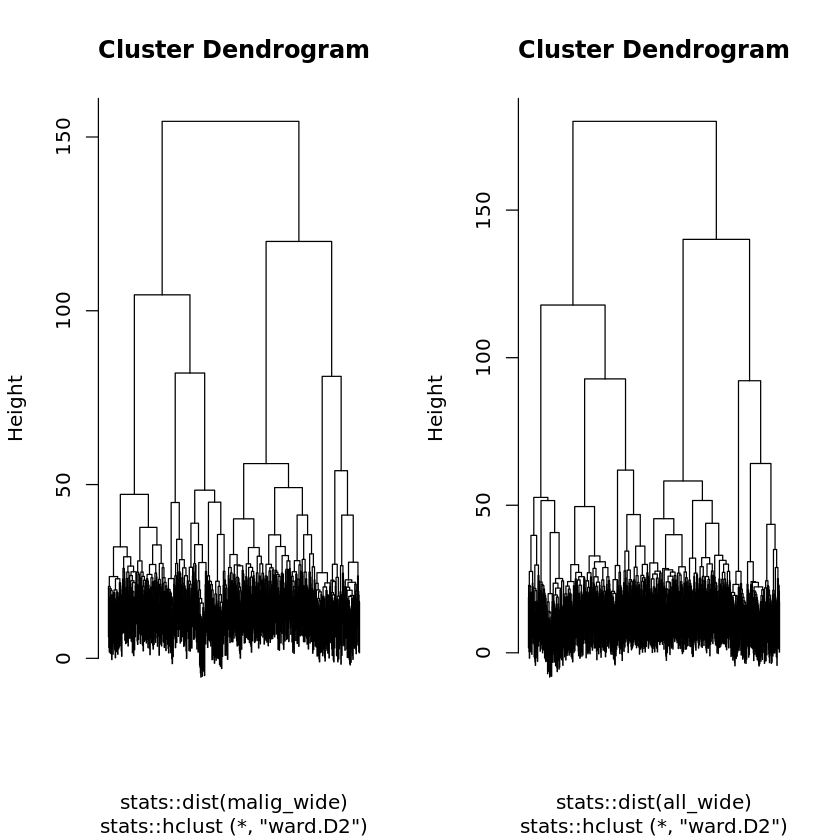

In [20]:
run_slide_cna(counts, 
              beads_df, 
              gene_pos,
              output_directory,
              plot_directory,
              spatial=TRUE)

#### Analyze Seurat Object of Slide-seq data

In [21]:
so <- readRDS(file=file.path(output_directory, "so.rds"))
md <- read.table(file=file.path(output_directory, "md_bin.txt"))

In [24]:
head(so)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.8,seurat_clusters,V1,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,pos_x,pos_y,cluster_type,bc
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AACGTCATAATCGT,SeuratProject,23736,6503,0,11,11,AACGTCATAATCGT,6503,23736,0,0,888.95,3219.5,Malignant,AACGTCATAATCGT
TACTTTAGCGCAGT,SeuratProject,19632,5988,0,11,11,TACTTTAGCGCAGT,5988,19632,0,0,4762.20,5020.4,Malignant,TACTTTAGCGCAGT
CATGCCTGGGTTCG,SeuratProject,15982,5303,0,11,11,CATGCCTGGGTTCG,5303,15982,0,0,886.50,3199.6,Malignant,CATGCCTGGGTTCG
TCGATATGGCACAA,SeuratProject,15038,5523,0,11,11,TCGATATGGCACAA,5523,15038,0,0,2237.10,5144.6,Malignant,TCGATATGGCACAA
TTATCTGACGAAGC,SeuratProject,13993,4927,0,11,11,TTATCTGACGAAGC,4927,13993,0,0,1031.80,2425.2,Normal,TTATCTGACGAAGC
GATGCGACTCCTCG,SeuratProject,12712,4345,0,5,5,GATGCGACTCCTCG,4345,12712,0,0,5387.00,2291.6,Malignant,GATGCGACTCCTCG
ACGGATGTTCCGAT,SeuratProject,10424,3656,0,13,13,ACGGATGTTCCGAT,3656,10424,0,0,3760.30,4171.7,Malignant,ACGGATGTTCCGAT
TCTCATGGGTGGGA,SeuratProject,10761,3874,0,13,13,TCTCATGGGTGGGA,3874,10761,0,0,1007.90,3523.8,Normal,TCTCATGGGTGGGA
ACCGGAACTTCTTC,SeuratProject,9739,4328,0,12,12,ACCGGAACTTCTTC,4328,9739,0,0,3259.40,1233.7,Malignant,ACCGGAACTTCTTC


In [22]:
# TSNE Plots

In [25]:
legend_title = "Cell Types"
options(repr.plot.width = 8, repr.plot.height = 4)
TSNEPlot(so, label.size = 18, group.by="cell_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

ERROR: [1m[33mError[39m in `object[[group.by]]`:[22m
[33m![39m 'cell_type' not found in this Seurat object
 Did you mean "cluster_type"?


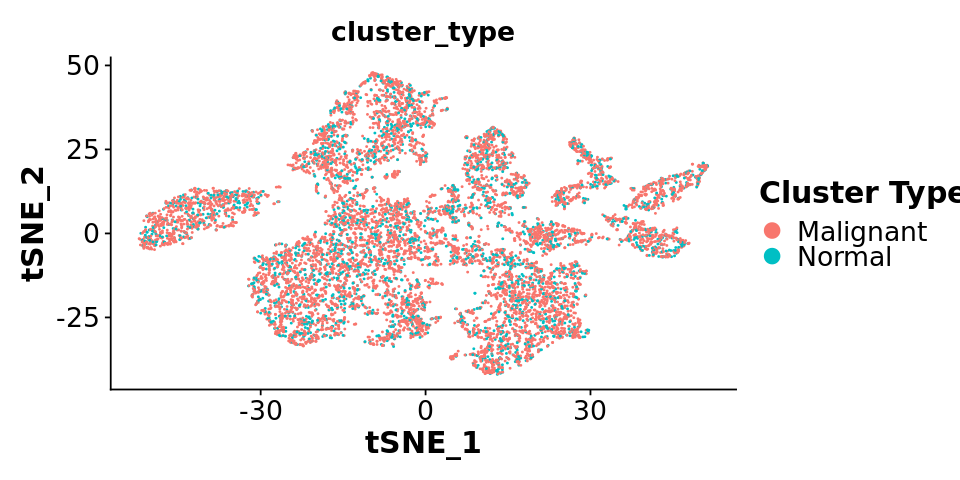

In [26]:
legend_title = "Cluster Type"
options(repr.plot.width = 8, repr.plot.height =4)
TSNEPlot(so, label.size = 18, group.by="cluster_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

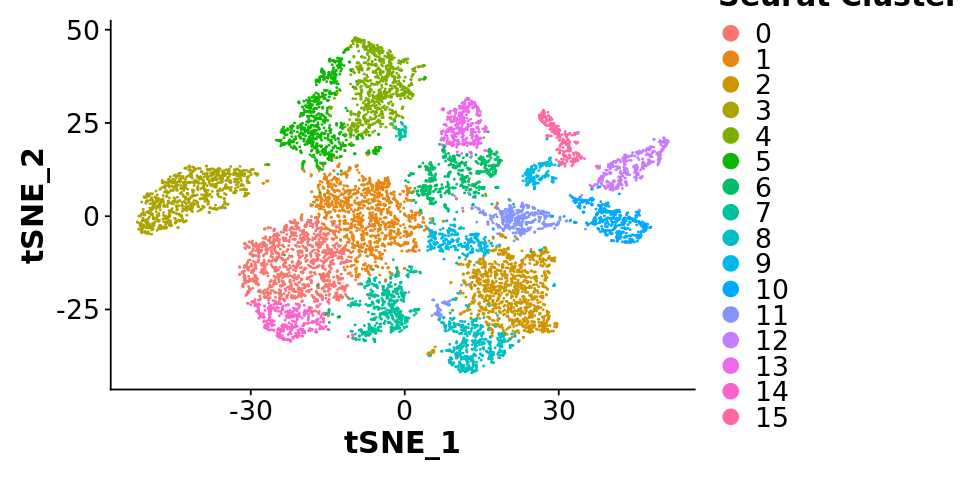

In [27]:
legend_title = "Seurat Clusters"
options(repr.plot.width = 8, repr.plot.height =4)
TSNEPlot(so, label.size = 18) +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

In [28]:
# Spatial plots

In [29]:
legend_title = "Cell Types"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=(cell_type)))+geom_point(size=0.5, position="jitter")+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error:
! object 'cell_type' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 

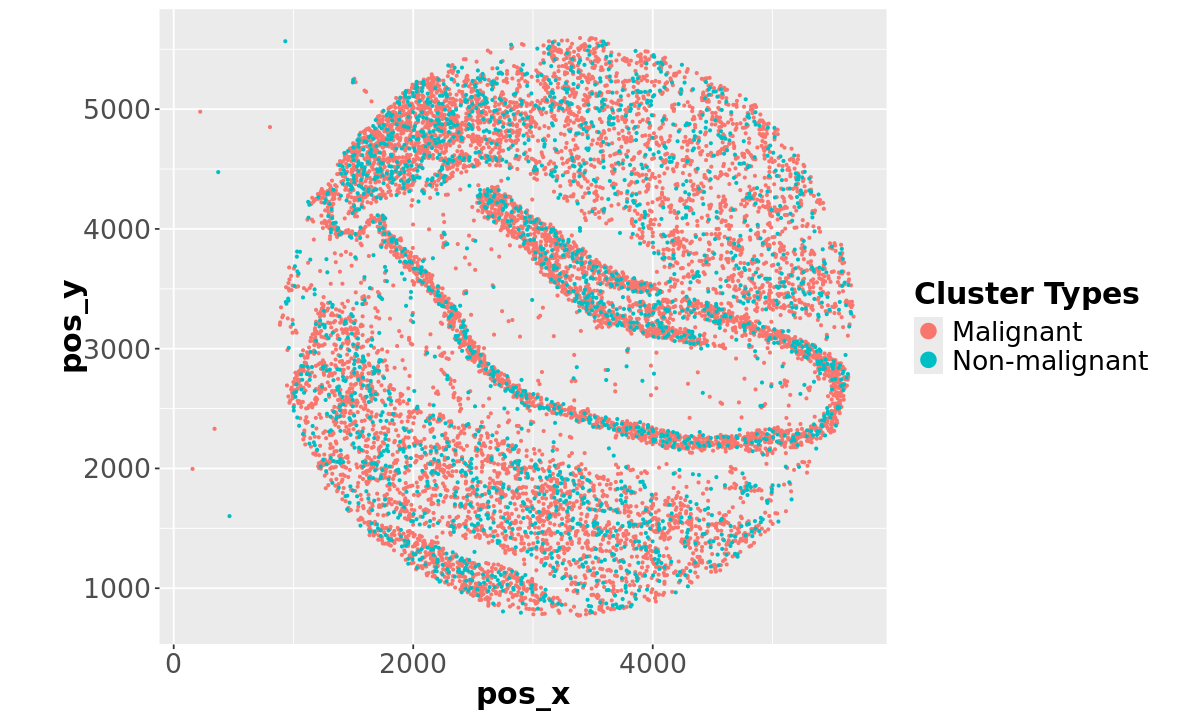

In [30]:
legend_title = "Cluster Types"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=(cluster_type)))+geom_point(size=0.5, position="jitter")+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

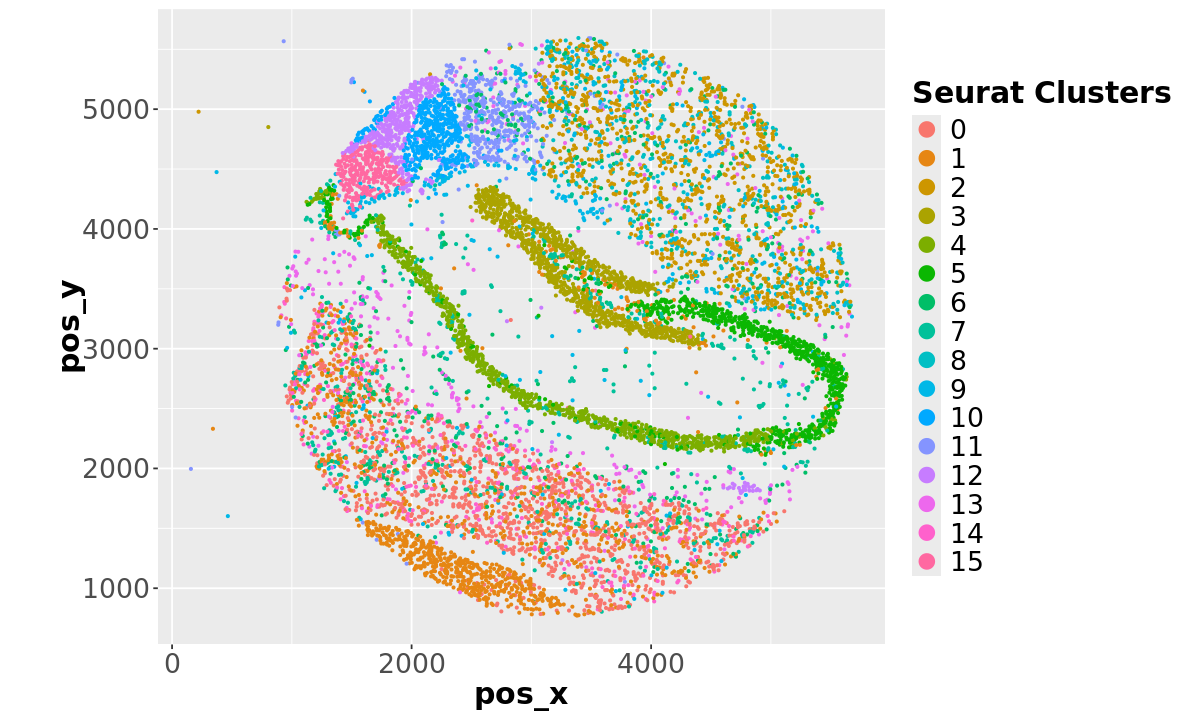

In [31]:
legend_title = "Seurat Clusters"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=as.factor(seurat_clusters)))+geom_point(size=0.5)+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

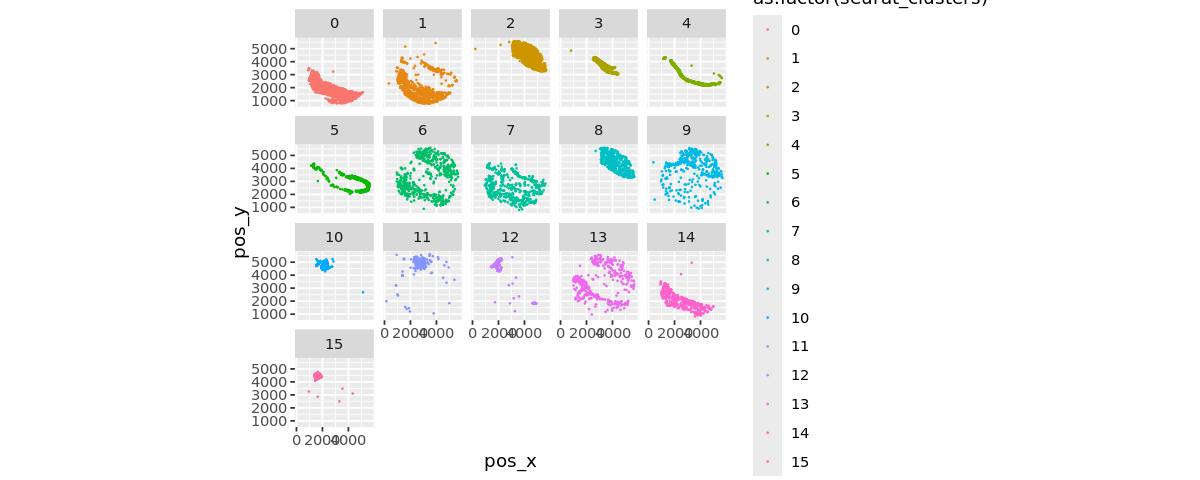

In [32]:
options(repr.plot.width = 10, repr.plot.height =4)
ggplot(md,aes(x=pos_x,y=pos_y,col=as.factor(seurat_clusters)))+geom_point(size=0.1)+coord_fixed()+facet_wrap(~seurat_clusters,ncol=5)